In [31]:
import os
import re
import numpy as np
# Function to extract the number of stuck particles from a file
def extract_stuck_particles(file_path):
    try:
        with open(file_path, 'r') as f:
            content = f.read()
            
            # Use regex to find the nStick pattern and extract the value
            pattern = r'nStick\s+4\s+\(\s+1\s+\(\s+\d+\s+\)\s+1\s+\(\s+(\d+)\s+\)'
            match = re.search(pattern, content)
            
            if match:
                return int(match.group(1))
            else:
                return 0
    except FileNotFoundError:
        return None
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to process all time directories
def process_time_directories(base_dir):
    times = []
    stuck_particles = []
    
    # Get all directories that represent time steps
    all_items = os.listdir(base_dir)
    time_dirs = []
    
    for item in all_items:
        # Check if the item is a directory and can be converted to a float (time step)
        if os.path.isdir(os.path.join(base_dir, item)):
            try:
                time_value = float(item)
                time_dirs.append((time_value, item))
            except ValueError:
                # Skip directories that are not time steps
                continue
    
    # Sort time directories by their numerical value
    time_dirs.sort()
    
    # Process each time directory
    for time_value, time_dir in time_dirs:
        cloud_props_path = os.path.join(base_dir, time_dir, 'uniform/lagrangian/kinematicCloud/kinematicCloudOutputProperties')
        
        # Check if the file exists and process it
        if os.path.isfile(cloud_props_path):
            stuck_count = extract_stuck_particles(cloud_props_path)
            
            if stuck_count is not None:
                times.append(time_value)
                stuck_particles.append(stuck_count)
                # print(f"Time: {time_value}, Stuck Particles: {stuck_count}")
    
    return times, stuck_particles

# Main execution
base_directory = "."  # Current directory, adjust if needed
times, stuck_particles = process_time_directories(base_directory)



/tmp/ipykernel_175940/2002364242.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


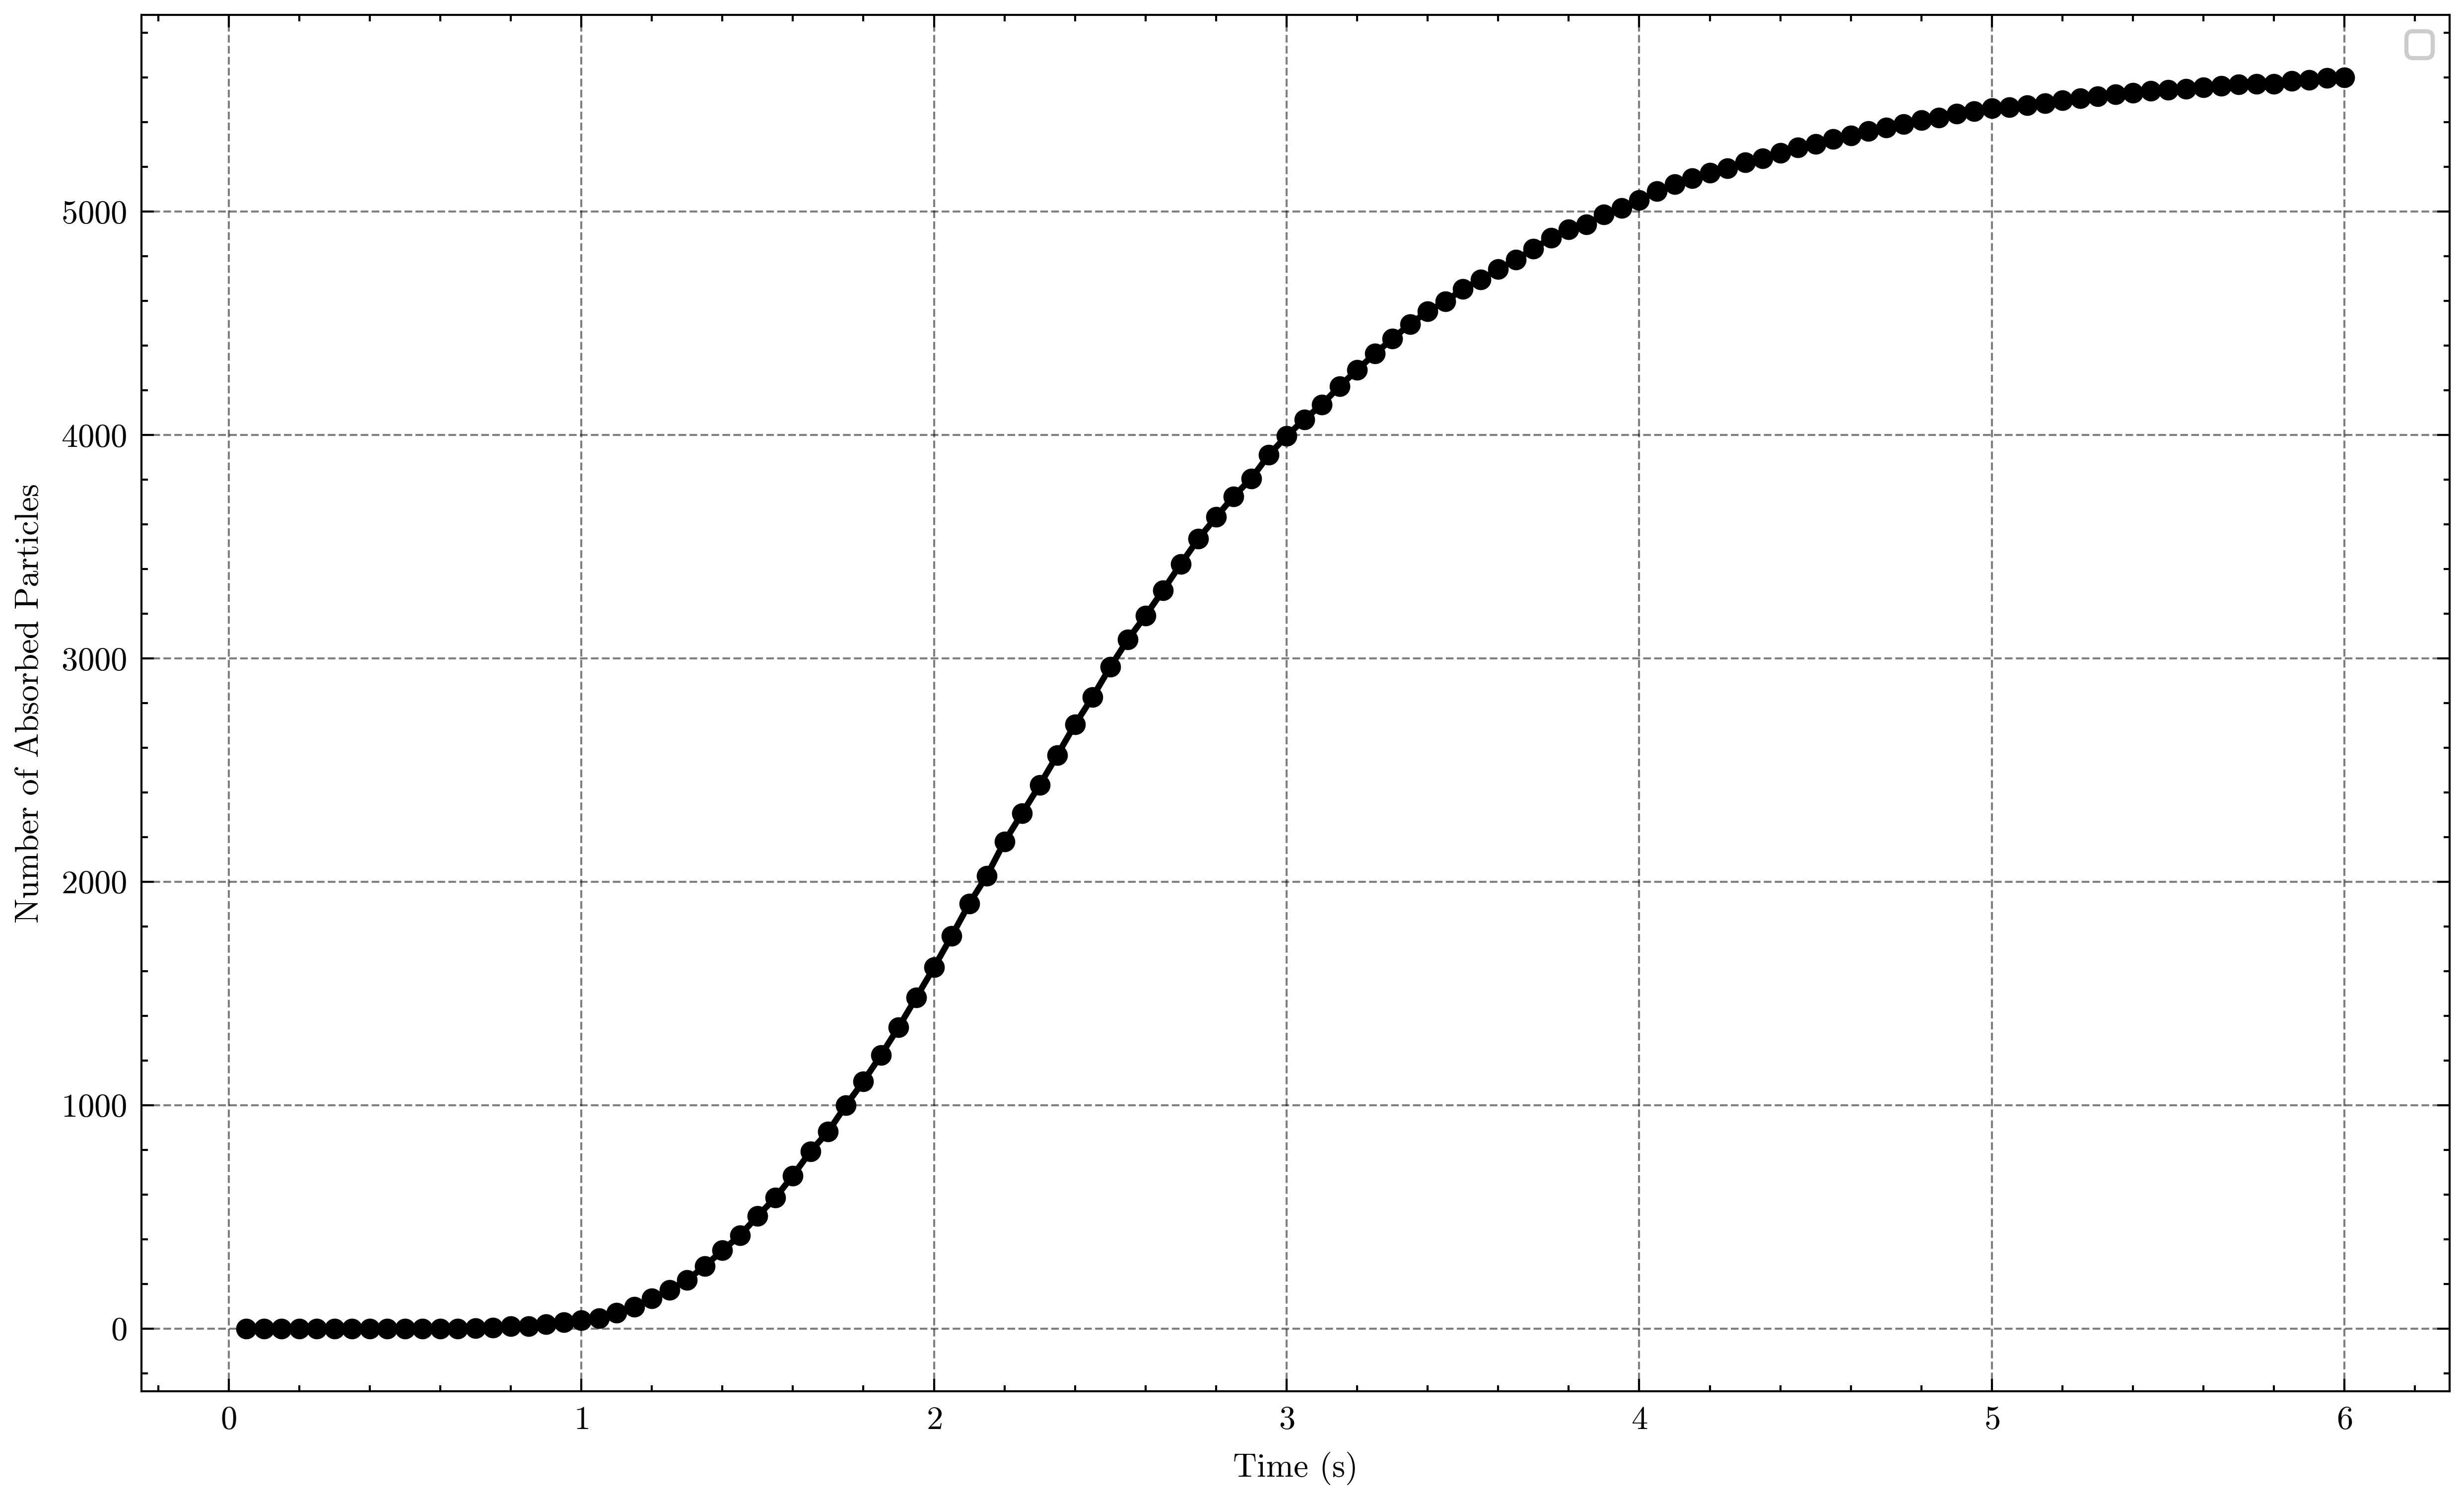


Statistics:
Maximum number of stuck particles: 5601 at time 6.0
Simulation duration: 5.95 seconds
Average rate of particle accumulation: 1046.92 particles/second

Data exported to 'stuck_particles_data.csv'


In [32]:
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd

# Set the scientific style for plots
plt.rc('font', family='times new roman')
# plt.style.use(['science', 'grid', 'no-latex'])
plt.style.use(['science', 'ieee', 'grid', 'no-latex'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, stuck_particles, 'o-', linewidth=1.5, markersize=4)
# plt.title('Number of Stuck Particles Over Time')
plt.xlabel('Time (s)')
# plt.ylabel('Number of Stuck Particles')
plt.ylabel('Number of Absorbed Particles')
plt.legend()

# Use integer y-axis for particles count
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# save to pdf
plt.savefig('stuck_particles.pdf', bbox_inches='tight')

plt.show()

# Calculate and display some statistics
if stuck_particles:
    print("\nStatistics:")
    print(f"Maximum number of stuck particles: {max(stuck_particles)} at time {times[stuck_particles.index(max(stuck_particles))]}")
    if times and len(times) > 1:
        print(f"Simulation duration: {max(times) - min(times)} seconds")
    
    # Calculate rate of particle accumulation
    if len(times) > 1:
        # Find periods of continuous increase
        increasing_rates = []
        for i in range(1, len(times)):
            if stuck_particles[i] > stuck_particles[i-1]:
                rate = (stuck_particles[i] - stuck_particles[i-1]) / (times[i] - times[i-1])
                increasing_rates.append(rate)
        
        if increasing_rates:
            avg_rate = sum(increasing_rates) / len(increasing_rates)
            print(f"Average rate of particle accumulation: {avg_rate:.2f} particles/second")

# Export data to CSV for further analysis
df = pd.DataFrame({
    'Time': times,
    'StuckParticles': stuck_particles
})
df.to_csv('stuck_particles_data.csv', index=False)
print("\nData exported to 'stuck_particles_data.csv'")